# ANALYSIS OF THE RELATIONSHIPS BETWEEN THE FEATURES OF A TWO-DIMENSIONAL DATASET

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns

## Reading a file

In [2]:
df = pd.read_csv('24liver.csv')

## Data preprocessing:

In [3]:
new_columns = [col.lower() for col in df.columns]
df = df.rename(columns={col: col.lower() for col in df.columns})
df = df.rename(columns={
    'totalbilirubin': 'total_bilirubin',
    'total_protiens': 'total_proteins',
    'dataset123': 'objective'
})

In [4]:
df['gender'] = df['gender'].replace('Mal', 'Male')
df = df.loc[df['objective'] != 'yes']

In [5]:
df = df.drop_duplicates().reset_index()
df = df.drop('index', axis=1)

In [6]:
to_num_cols = ['aspartate_aminotransferase', 'objective']
int_cols = to_num_cols.copy()
types = dict(df.dtypes)
for col in types:
    type = str(types[col])
    if type == 'float64':
        to_num_cols.append(col)
        if type == 'int64':
            int_cols.append(col)
for col in to_num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['aspartate_aminotransferase'])
df = df.astype({col: 'int64' for col in int_cols})

In [7]:
df = df.dropna(
    subset=[
        'total_bilirubin',
        'alkaline_phosphotase',
        'albumin_and_globulin_ratio'
        ]).reset_index()
df = df.drop('index', axis=1)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_proteins                0
albumin                       0
albumin_and_globulin_ratio    0
objective                     0
dtype: int64

In [10]:
df.dtypes

age                             int64
gender                         object
total_bilirubin               float64
direct_bilirubin              float64
alkaline_phosphotase          float64
alamine_aminotransferase        int64
aspartate_aminotransferase      int64
total_proteins                float64
albumin                       float64
albumin_and_globulin_ratio    float64
objective                       int64
dtype: object

## Plotting a scatter plot (matrix of scatter plots):

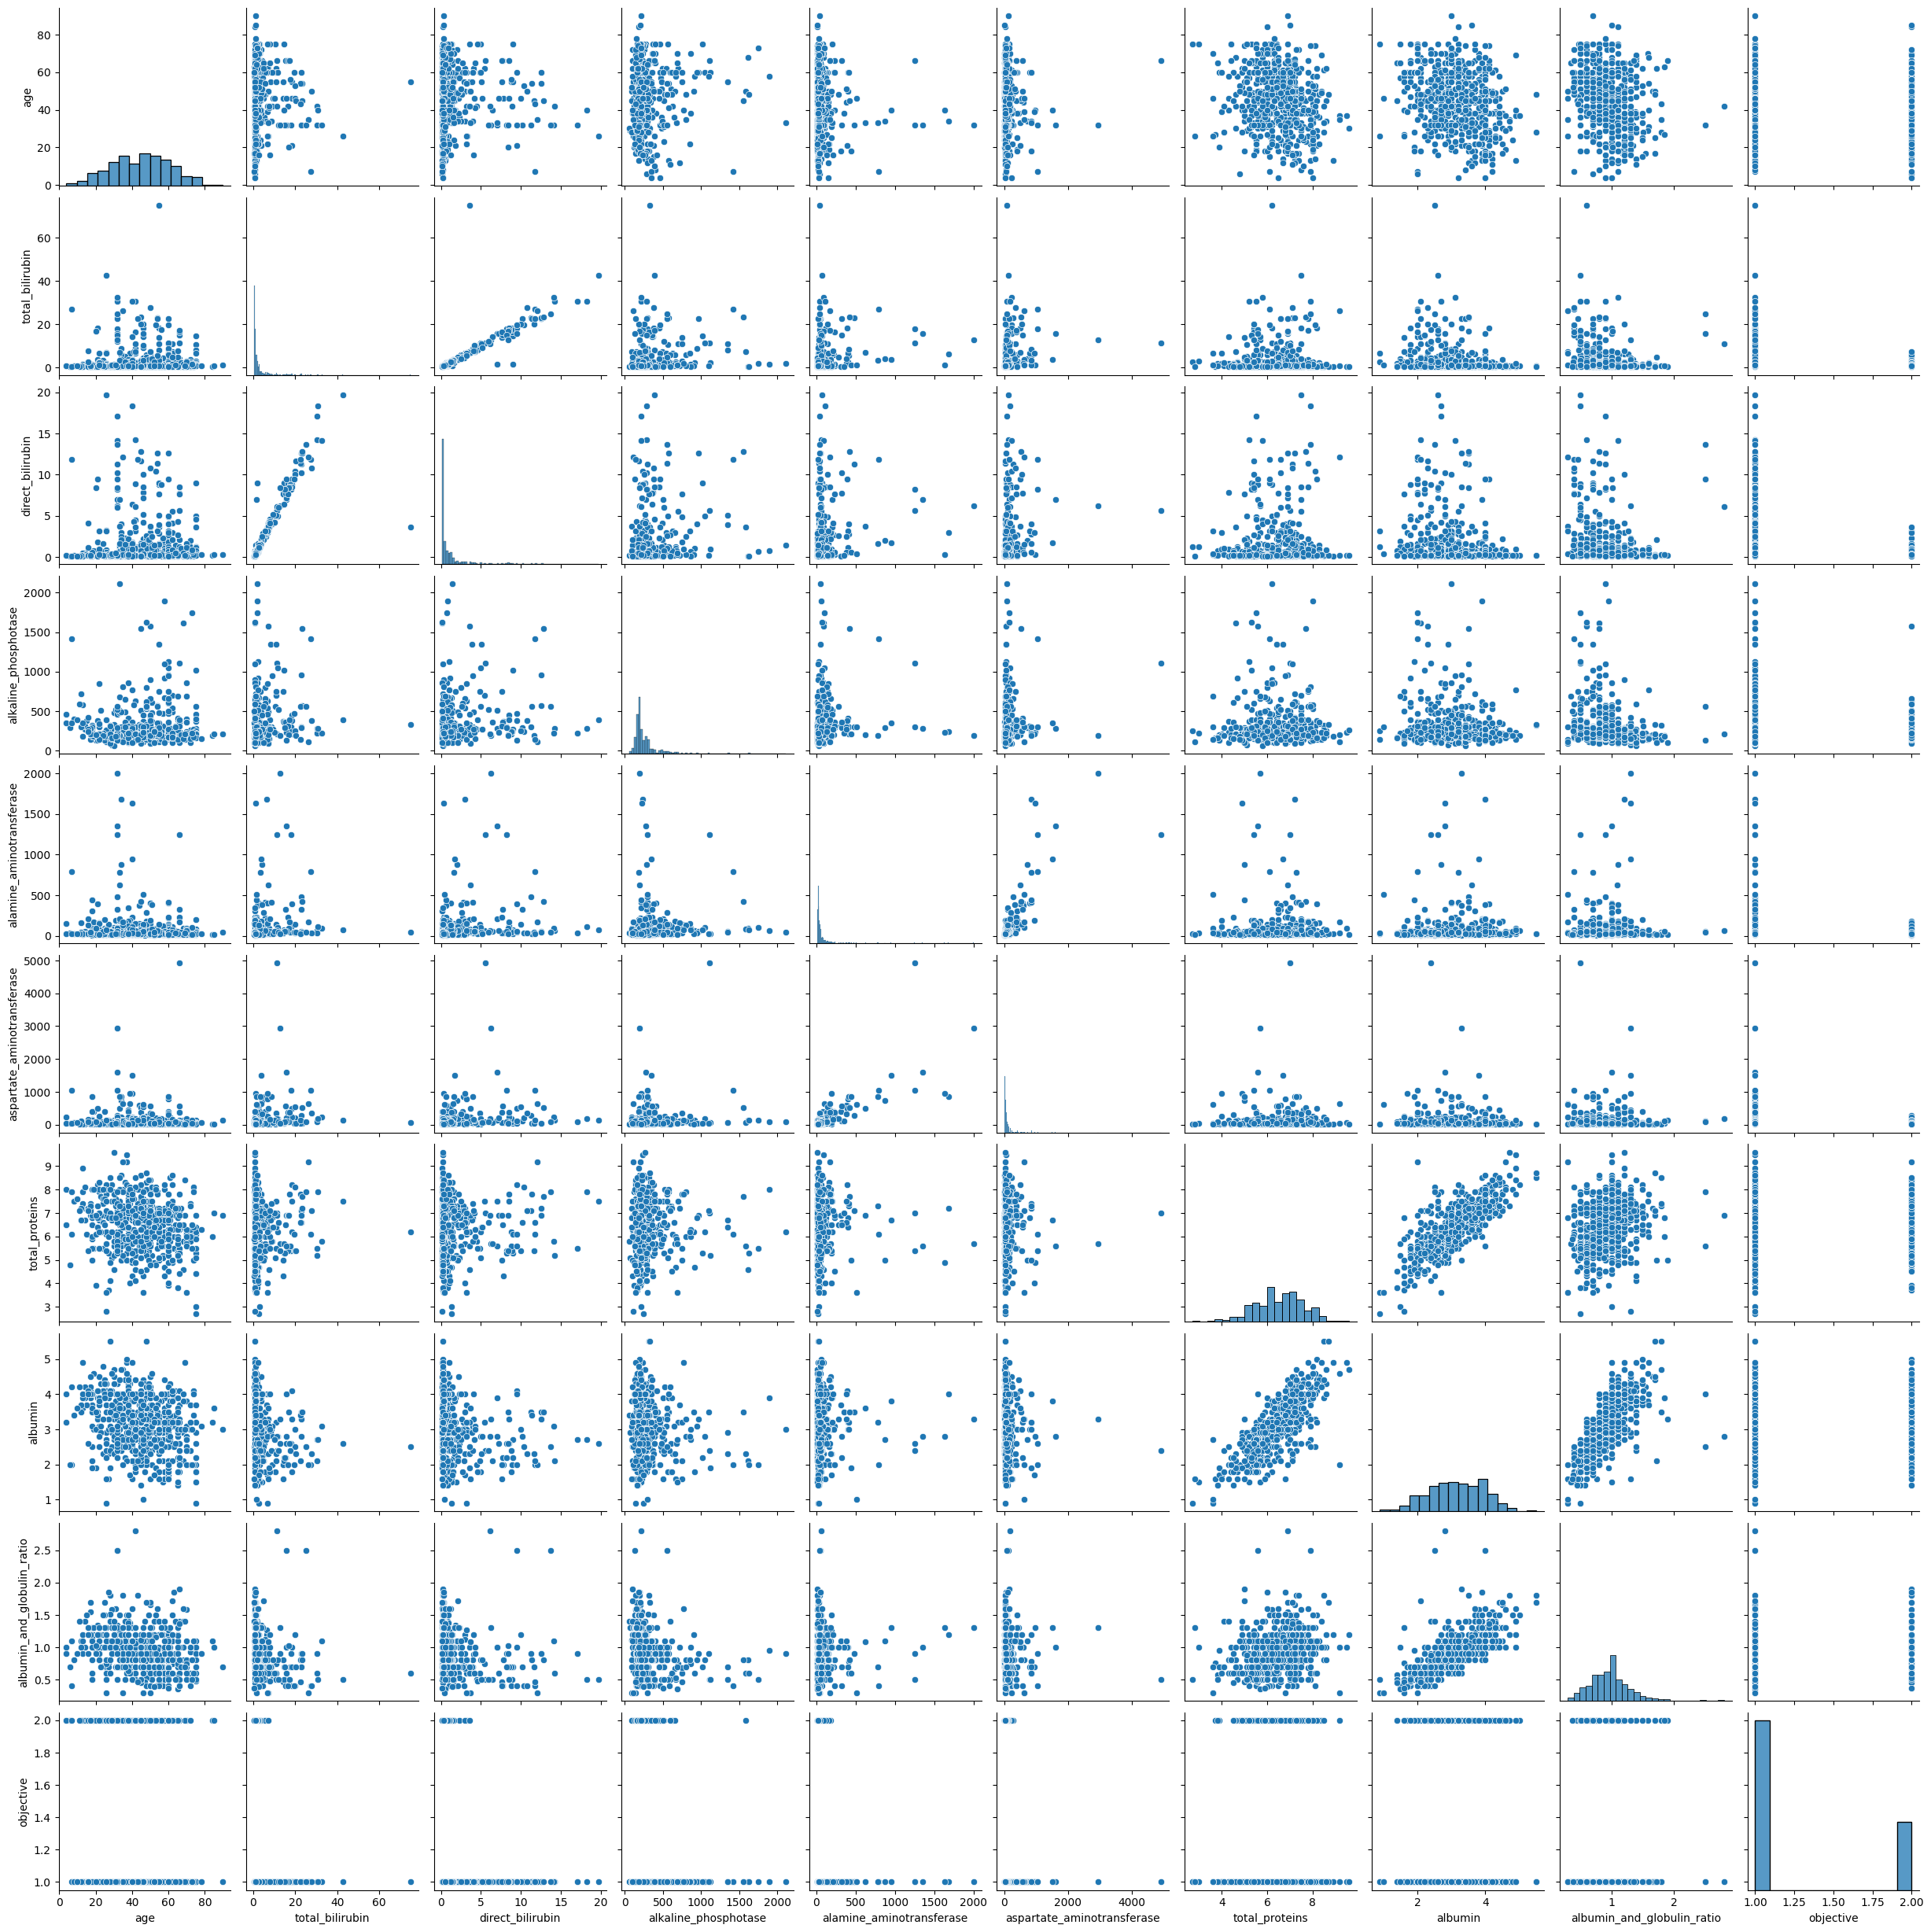

In [11]:
sns.pairplot(df)

Among the scattering diagrams, a scattering diagram of the total number of proteins and albumin (albumin - protein) can be distinguished. Correlation coefficient and separate chart

In [12]:
df['total_proteins'].corr(df['albumin'])

0.7856777168483983

<AxesSubplot: xlabel='total_proteins', ylabel='albumin'>

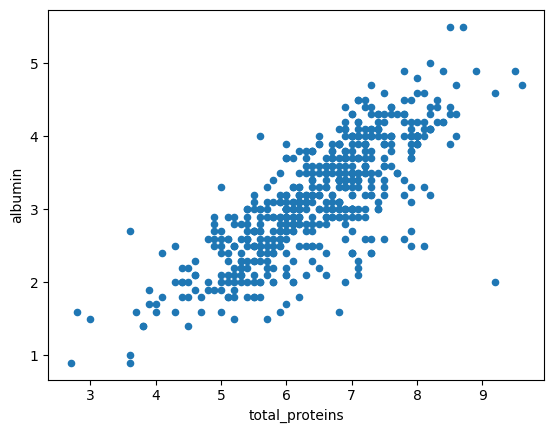

In [13]:
df.plot(x='total_proteins', y='albumin', kind='scatter')

A box with a mustache for the total number of proteins:

<AxesSubplot: >

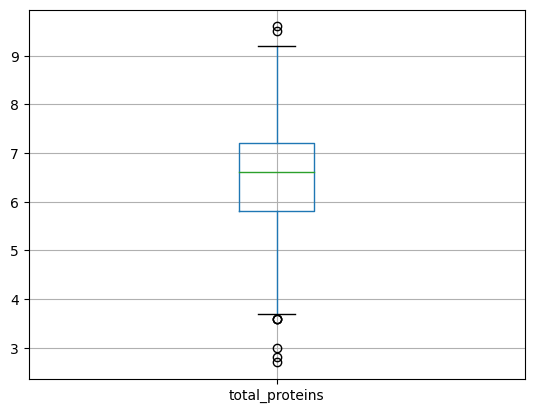

In [14]:
df.boxplot('total_proteins')

Removal of emissions (too low and too high protein levels):

In [15]:
Q1 =  df['total_proteins'].quantile(0.25)
Q3 = df['total_proteins'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_proteins'] > (Q1-1.5*IQR)) & (df['total_proteins'] < (Q3+1.5*IQR))]

No emissions chart:

<AxesSubplot: xlabel='total_proteins', ylabel='albumin'>

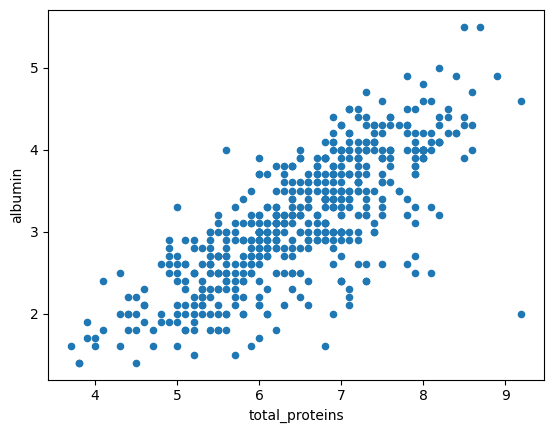

In [16]:
df.plot(x='total_proteins', y='albumin', kind='scatter')

## Building a correlation heat map:

/var/folders/1l/s9467ybd3mv7k3l3qdj3jy240000gn/T/ipykernel_1505/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

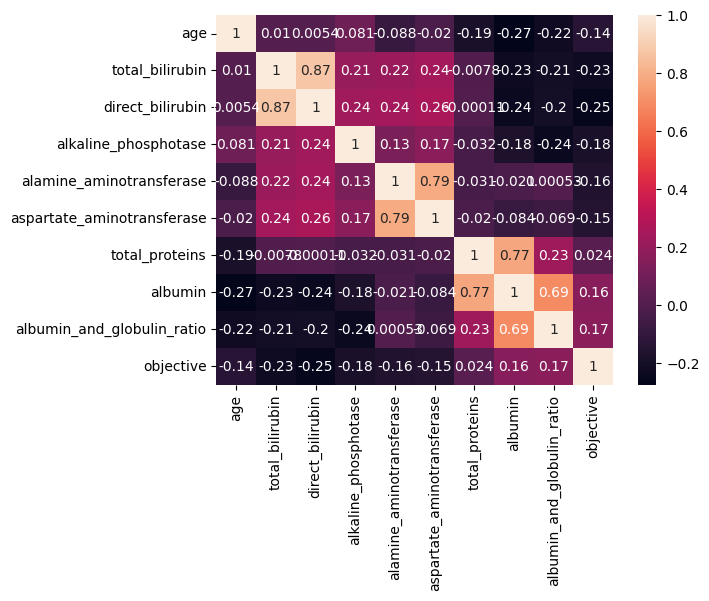

In [17]:
sns.heatmap(df.corr(), annot=True)

It can be seen that the removal of outliers had practically no effect on the closeness of the relationship of the studied quantities.

The following linear dependencies can also be distinguished from this map:

* Total bilirubin from direct bilirubin
* Alanine Aminotransferase from aspartate aminotransferase
* The ratio of albumins and globulins from albumin

Let's look at their scattering diagrams and, if there are outliers, remove them:

## Total bilirubin from direct bilirubin

<AxesSubplot: xlabel='total_bilirubin', ylabel='direct_bilirubin'>

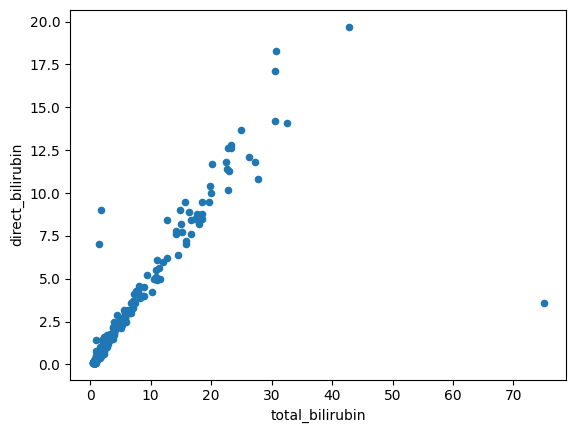

In [18]:
df.plot(x='total_bilirubin', y='direct_bilirubin', kind='scatter')

A certain number of outliers can be observed on the diagram, so we remove them:

In [19]:
Q1 =  df['total_bilirubin'].quantile(0.25)
Q3 = df['total_bilirubin'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_bilirubin'] > (Q1-1.5*IQR)) & (df['total_bilirubin'] < (Q3+1.5*IQR))]

Q1 =  df['direct_bilirubin'].quantile(0.25)
Q3 = df['direct_bilirubin'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['direct_bilirubin'] > (Q1-1.5*IQR)) & (df['direct_bilirubin'] < (Q3+1.5*IQR))]

<AxesSubplot: xlabel='total_bilirubin', ylabel='direct_bilirubin'>

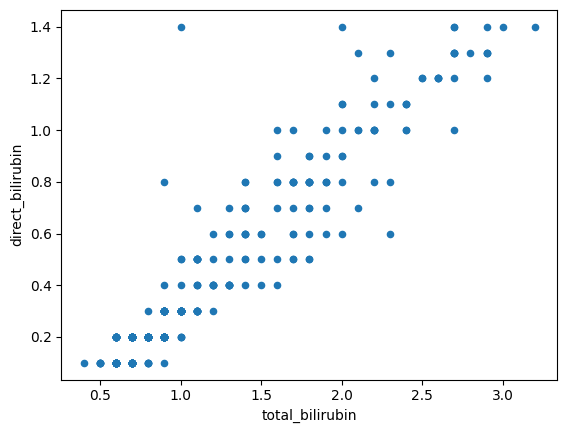

In [20]:
df.plot(x='total_bilirubin', y='direct_bilirubin', kind='scatter')

Let's build the correlation heat map again:

/var/folders/1l/s9467ybd3mv7k3l3qdj3jy240000gn/T/ipykernel_1505/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

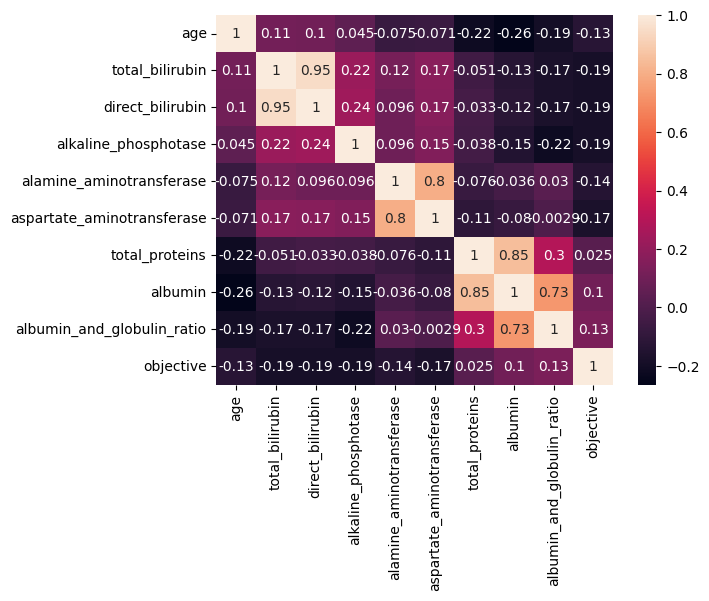

In [21]:
sns.heatmap(df.corr(), annot=True)

As can be seen, the dependence of total bilirubin on direct bilirubin has become even closer after the removal of emissions and is now almost equal to one (0.95)

## Alanine aminotransferase from aspartate aminotransferase

<AxesSubplot: xlabel='alamine_aminotransferase', ylabel='aspartate_aminotransferase'>

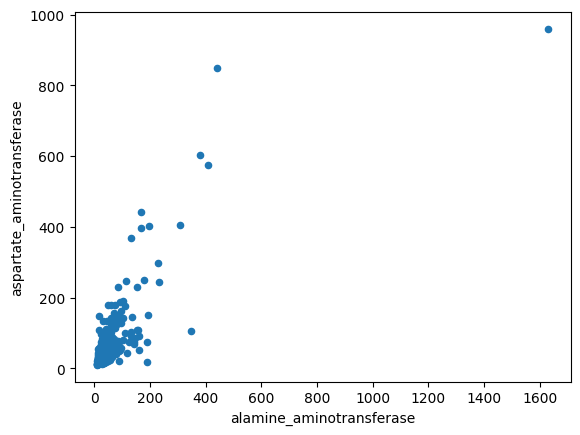

In [22]:
df.plot(x='alamine_aminotransferase', y='aspartate_aminotransferase', kind='scatter')

A certain number of outliers can be observed on the diagram, so we remove them:

In [23]:
Q1 =  df['alamine_aminotransferase'].quantile(0.25)
Q3 = df['alamine_aminotransferase'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['alamine_aminotransferase'] > (Q1-1.5*IQR)) & (df['alamine_aminotransferase'] < (Q3+1.5*IQR))]

Q1 =  df['aspartate_aminotransferase'].quantile(0.25)
Q3 = df['aspartate_aminotransferase'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['aspartate_aminotransferase'] > (Q1-1.5*IQR)) & (df['aspartate_aminotransferase'] < (Q3+1.5*IQR))]

<AxesSubplot: xlabel='alamine_aminotransferase', ylabel='aspartate_aminotransferase'>

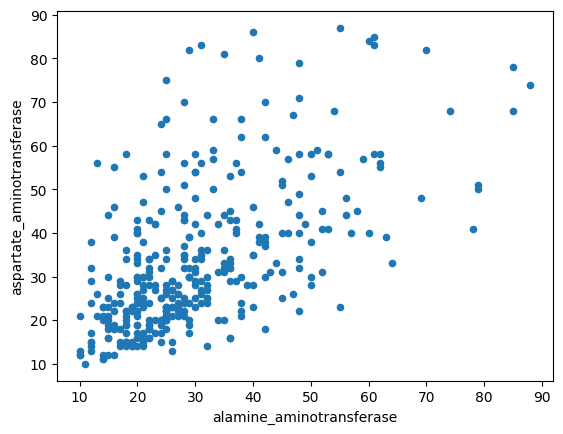

In [24]:
df.plot(x='alamine_aminotransferase', y='aspartate_aminotransferase', kind='scatter')

Let's build the correlation heat map again:

/var/folders/1l/s9467ybd3mv7k3l3qdj3jy240000gn/T/ipykernel_1505/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

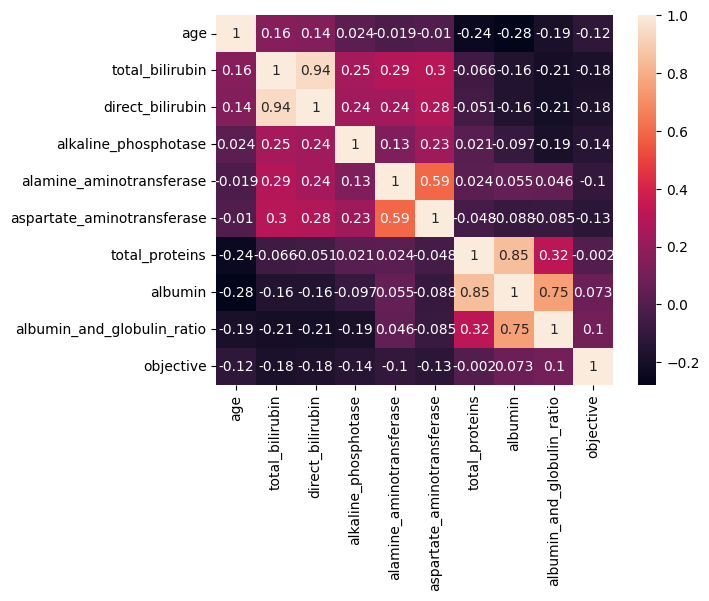

In [25]:
sns.heatmap(df.corr(), annot=True)

As can be seen, the dependence of alanine aminotransferase on aspartate aminotransferase became less tight after the removal of emissions, from which it can be concluded that emissions created a false effect of tightness of correlation.

## The ratio of albumins and globulins from albumin

<AxesSubplot: xlabel='albumin', ylabel='albumin_and_globulin_ratio'>

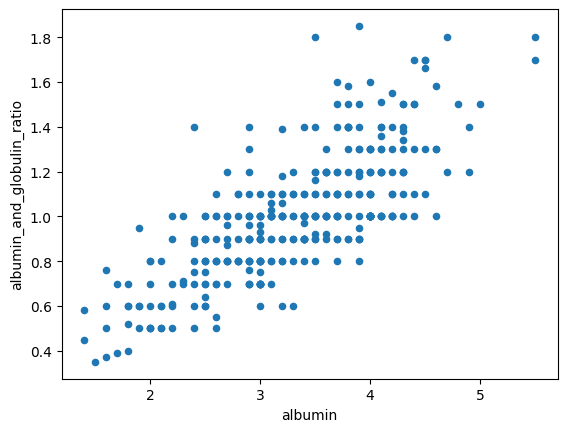

In [26]:
df.plot(x='albumin', y='albumin_and_globulin_ratio', kind='scatter')

According to the diagram, there are practically no outliers, and if there are, they have little or no effect on the correlation. From the names of these columns, it can be understood that the linear relationship between the values is clearly present.

## Conclusion:
In the course of this laboratory work, the relationships between the features of a two-dimensional dataset were studied. To be precise, after the initial data processing, a matrix of scattering diagrams was built, during the analysis of which a digram was revealed showing a close relationship between the two quantities. Next, this diagram was studied in detail, outliers were removed, after which the closeness of the correlation increased.
Next, a heat map of the correlation was constructed, from which three more dependencies were also identified, which were also considered in detail. After analyzing them, it can be concluded that with the removal of outliers, the tightness of the correlation may not only increase, but also decrease.
The date frame also contains a target feature: whether the patient has liver disease or not. Based on the analysis of the histogram of the distribution, it can be concluded that there are more patients with diseases than healthy ones, which may indicate that the data in the dataset is unbalanced.